<a href="https://colab.research.google.com/github/JamilyaSultan/INDE-597-Deep-and-Reinforcement-Learning/blob/main/Copy_of_Student_Cats_and_Dogs_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Give Google Colab access to your Google Drive containing the dogs and cats data
from google.colab import drive
drive.mount('/content/drive')

# Unzip the data from your Google Drive
!unzip '/content/drive/My Drive/Data Set/dogs-vs-cats-redux-kernels-edition.zip'
!unzip 'test.zip'
!unzip 'train.zip'

# Make directories containing the data in your current Colab session
!mkdir train/{dog,cat}
!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat

!mkdir test/images
!find test -maxdepth 1 -type f | xargs -I{} mv {} test/images

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import pathlib

In [ ]:

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
train_dir = './train'
total_train = len(os.listdir('./train/dog')) + len(os.listdir('./train/cat'))
total_test = len(os.listdir('./test/images/'))
validation_split = 0.2

batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
print(f"total_train = {total_train}")
print(f"total_test = {total_test}")

total_train = 25000
total_test = 12500


In [ ]:



train_image_generator = ImageDataGenerator(rescale=1./255,
                                           validation_split=validation_split)


train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           subset='training')

val_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


---

```train_data_gen``` contains 157 python tuples. 

```python
>> len(train_data_gen) 
>> 157
```
Each tuple represents a batch of data and each batch consists of 128 instances of training images and labels (0 or 1). Each image is of shape ```(150, 150, 3)```, which means the images are 150 pixels wide, 150 pixels tall, and 3 (RGB) color channels deep. 
```python
>>> type(train_data_gen[0]) # The 0-th batch
tuple
>>> train_data_gen[0][0].shape # The 0-th batch images
(128, 150, 150, 3)
>>> train_data_gen[0][1].shape # The 0-th batch labels
(128,)
>>> train_data_gen[0][0][0, :, :].shape # The 0-th image in the 0-th batch
(150, 150, 3)

```


---

In [ ]:
print(f"type(train_data_gen[0]) = {type(train_data_gen[0])}")
print(f"train_data_gen[0][0].shape = {train_data_gen[0][0].shape}")
print(f"train_data_gen[0][1].shape = {train_data_gen[0][1].shape}")
print(f"train_data_gen[0][0][0, :, :].shape = {train_data_gen[0][0][0, :, :].shape}")

type(train_data_gen[0]) = <class 'tuple'>
train_data_gen[0][0].shape = (128, 150, 150, 3)
train_data_gen[0][1].shape = (128,)
train_data_gen[0][0][0, :, :].shape = (150, 150, 3)


---

We can generate images of the data set with the ```plotImages``` function defined in an above code cell. This is shown in the following code cell. 


---

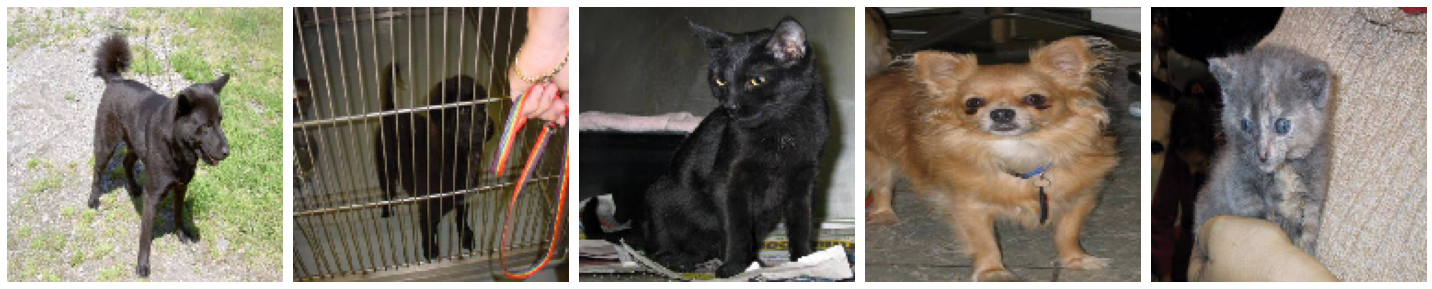

In [ ]:
index = np.random.randint(0, 150)
plotImages([train_data_gen[0][0][index + i, :, :] for i in range(5)])

In [ ]:


# Example convolutional neural network
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/10
157/157 [==============================] - 94s 498ms/step - loss: 0.6935 - accuracy: 0.5159 - val_loss: 0.6805 - val_accuracy: 0.5674
Epoch 2/10
157/157 [==============================] - 76s 482ms/step - loss: 0.6780 - accuracy: 0.5748 - val_loss: 0.6322 - val_accuracy: 0.6358
Epoch 3/10
157/157 [==============================] - 76s 483ms/step - loss: 0.6644 - accuracy: 0.6022 - val_loss: 0.6253 - val_accuracy: 0.6408
Epoch 4/10
157/157 [==============================] - 76s 482ms/step - loss: 0.6075 - accuracy: 0.6751 - val_loss: 0.5726 - val_accuracy: 0.7030
Epoch 5/10
157/157 [==============================] - 74s 474ms/step - loss: 0.5309 - accuracy: 0.7391 - val_loss: 0.5012 - val_accuracy: 0.7538
Epoch 6/10
157/157 [==============================] - 75s 479ms/step - loss: 0.4664 - accuracy: 0.7800 - val_loss: 0.4620 - val_accuracy: 0.7818
Epoch 7/10
157/157 [==============================] - 75s 479ms/step - loss: 0.4117 - accuracy: 0.8160 - val_loss: 0.4308 - val_ac

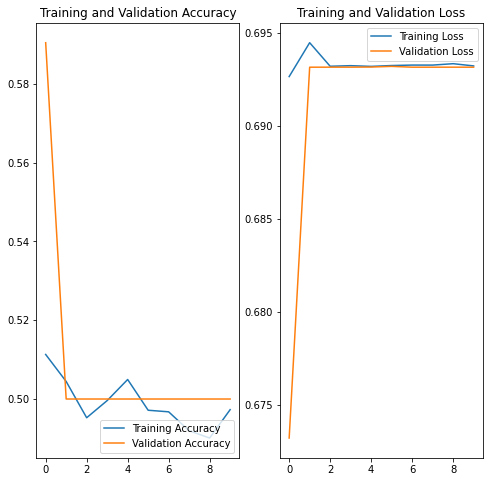

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()